In [ ]:
!pip install --upgrade diffusers transformers accelerate torch bitsandbytes scipy safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Enter your prompt: traffic in Mumbai
Generating image 1 for prompt: 'traffic in Mumbai'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 1 saved as traffic_in_Mumbai_image_1_20241117_070628.png


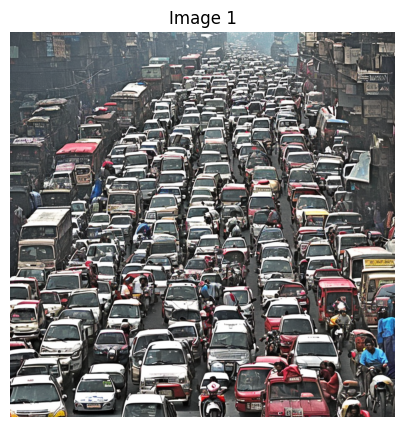

Generating image 2 for prompt: 'traffic in Mumbai'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 2 saved as traffic_in_Mumbai_image_2_20241117_070706.png


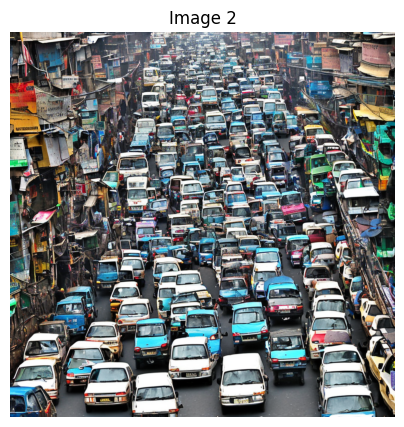

Generating image 3 for prompt: 'traffic in Mumbai'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 3 saved as traffic_in_Mumbai_image_3_20241117_070742.png


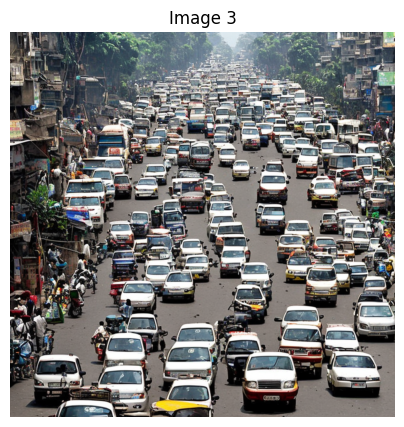

Generating image 4 for prompt: 'traffic in Mumbai'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 4 saved as traffic_in_Mumbai_image_4_20241117_070819.png


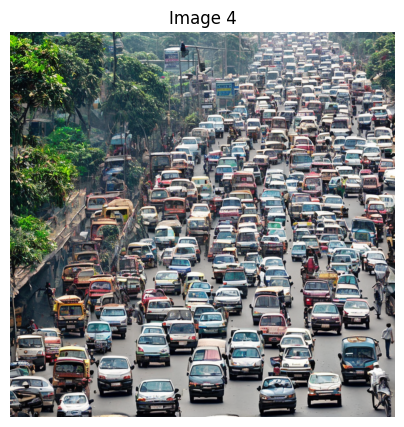

Generating image 5 for prompt: 'traffic in Mumbai'...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 5 saved as traffic_in_Mumbai_image_5_20241117_070856.png


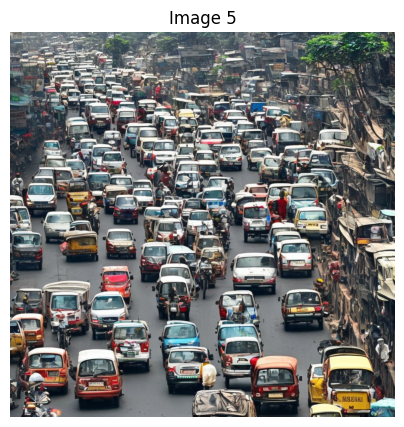

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt
from datetime import datetime
import os
import shutil

torch.cuda.empty_cache()
#loading the model
model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda")

#creating a downloads folder
download_folder = "downloads"
os.makedirs(download_folder, exist_ok=True)
#prompt input
prompt = input("Enter your prompt: ")
#image dimensions and number
width, height = 1000,1000
num_images=5
#image generation loop
filenames=[]

for i in range(num_images):
  print(f"Generating image {i + 1} for prompt: '{prompt}'...")
  image = pipe(prompt, width=width,height=height).images[0]

  timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
  #filename = f"{prompt.replace(" ","_")}_image_{i+1}_{timestamp.jpeg}"
  #filename = f"{prompt.replace(" ","_")}_image_{i+1}_{timestamp.jpeg}}"
  filename = f"{prompt.replace(' ', '_')}_image_{i + 1}_{timestamp}.png"
  filenames.append(filename)
  image.save(filename)

  print(f"Image {i+1} saved as {filename}")

  plt.figure(figsize=(5,5))
  plt.imshow(image)
  plt.axis('off')
  plt.title(f'Image {i+1}')
  plt.show()

#selecting the best image
selected_index = int(input(f'Enter the number of the best image (1-{num_images})'))
selected_image = filenames[selected_index]

#for moving the selected image
shutil.copy(selected_image, download_folder)
download_path = os.path.join(download_folder, os.path.basename(selected_image))
print(f"The best image has been downloaded to: {download_path}")


print("\nYour selected image is ready to use!")





